In [12]:
# K Mean Clustering
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset("titanic")

In [16]:
# Importing other libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # for Normalization

# Taking data now, X
X = df [['age','fare']]
X.age.fillna(X.age.mean(), inplace=True)

C:\Users\ff\AppData\Local\Temp\ipykernel_14932\288930125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(X.age.mean(), inplace=True)


In [22]:
# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

c:\Users\ff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
# Assigning clusters to labels
df['cluster'] = kmeans.labels_
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [26]:
df['cluster'].unique()

array([0, 2, 1])

<AxesSubplot: xlabel='age', ylabel='fare'>

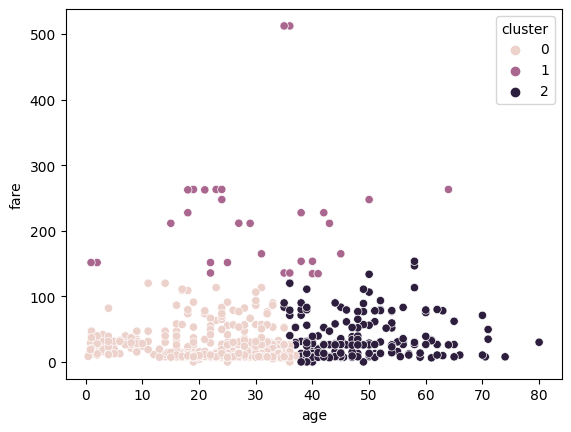

In [27]:
# Plotting the clusters
sns.scatterplot(data=df, x='age', y='fare', hue='cluster')

In [28]:
! pip install mpl_tools


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# Plotting with mpl_tools for 3D when variables are 3
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['age'], df['fare'], df['cluster'])
fig.show()


C:\Users\ff\AppData\Local\Temp\ipykernel_14932\3920551855.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 640x480 with 0 Axes>

In [33]:
# 3d Plotting with plotly
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='fare', z='cluster' , color='cluster')
fig.show()

In [35]:
# Parallel coordinate plotting using plotly
fig = px.parallel_coordinates(df, color='cluster')
fig.show()